# UDACITY NANODEGREE - DATA ANALYST

### Samuel Elegure

## P1: Test a Perceptual Phenomenon

# 1.0 Introduction

The stroop effect in psychology is a demonstration of interference in the reaction time of a task.In a Stroop task, participants are presented with a list of words, with each word displayed in a color of ink

This project is focussed on analysing the Stroop Effect on a task. The task has two conditions: a congruent words condition, and an incongruent words condition. In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed: for example RED, BLUE.

In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed: for example, PURPLE (printed in red), ORANGE (printed in blue).

# 2.0 Feature Engineering

## 2.1 Load Data and Required Packages

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%pylab inline
#import ggplot as ggplot

stroop = pd.read_csv('stroopdata.csv')
stroop.head()

cong = stroop['Congruent']
incong = stroop['Incongruent']

Populating the interactive namespace from numpy and matplotlib


## 2.2 Defining Variables

Independent variable = 'Congruent task' and 'Incongruent task'

Dependent variables = “Time taken to complete each task”

# 3.0 Descriptive Statistics

## 3.1 Visualizing the data

### Plotting Graph of Congruent task

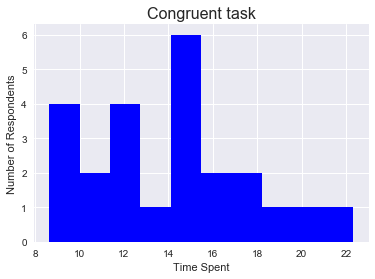

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(cong, color = 'blue')
plt.xlabel("Time Spent")
plt.ylabel("Number of Respondents")
plt.title("Congruent task", fontsize = 16)

The graph above shows a positively skewed distribution. The mode for the congruent data is 14 sec

### Plotting Graph of Incongruent task

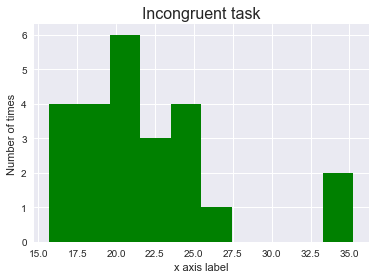

In [56]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(incong, color='green')
plt.xlabel("x axis label")
plt.ylabel("Number of times")
plt.title("Incongruent task", fontsize = 16)

The graph above shows that the incongruent task has an outlier. The mode for the incongruent task is about 21 sec

## 3.1.1 Boxplot

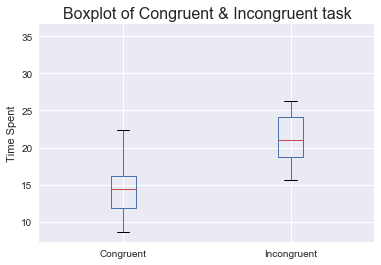

In [5]:
stroop.boxplot(column=['Congruent', 'Incongruent'])
plt.title("Boxplot of Congruent & Incongruent task", fontsize = 16)
plt.ylabel("Time Spent")

The Boxplot above shows that averagely, the respondents significantly spent more time on the incongruent task when compared to the congruent task. The median for congruent data is about 14 secs while the median for the incongruent is around 21 sec

## 3.2 Measure of Center

In [7]:
stroop.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


## 3.2.1 Mean, Median, Mode:

Congruent task:
<ls> The average time spent on Congruent task is 14 seconds. The median is almost same at 14.3 seconds. The mode is also about 14 seconds. It can be said that the center of tendency for the congruent task is 14 seconds. Because the Mean, Median and Mode are around 14 seconds and there is no outlier in the distribution.

Incongruent task:
<ls> The median and the Mode of the Incongruent data is about 21 seconds which is not so much different from the Mean at 22 seconds. But because of the presence of an outlier in the incongruent task, the mean can be said not to be accurate. Hence we will use the median and the mode figures of 21 seconds as the center of tendency in the incongrent task.

## 3.2.2 Min & Max:

<ls> The minimum time spent by participants on the congruent task is almost half the minimum time spent on the incongruent task. 
<ls> The Maximum time spent on the congruent task is 22 sec while the maximum time spent on the incongruent task is 35 seconds.

# 3.3 Measure of Variability

## 3.3.1 Interquartile Range

In [6]:
def Range(dist):
    return max(dist) - min(dist)

def IQR(dist):
    return percentile(dist, 75) - percentile(dist, 25)

print ('Range for Congruent task is', Range(cong))
print ('Range for Incongruent task is', Range(incong))

print ('The Interquartile range for Congruent task is', IQR(cong))
print ('The Interquartile range for Incongruent task is', IQR(incong))

Range for Congruent task is 13.698
Range for Incongruent task is 19.568
The Interquartile range for Congruent task is 4.3055
The Interquartile range for Incongruent task is 5.33475


## 3.3.2 Outlier

In [7]:
## Check for Outlier in both task
#A number is considered an outlier if the number < Q1 - 1.5(IQR) or if > Q3 + 1.5(IQR)

def Outlier_points(dist):
    return percentile(dist, 25)-(1.5*IQR(dist)) , percentile(dist, 75)+(1.5*IQR(dist))

print ('The outlier points for the Congruent task is', Outlier_points(cong))
print ('The outlier points for the Incongruent task is', Outlier_points(incong))

The outlier points for the Congruent task is (5.4370000000000029, 22.658999999999999)
The outlier points for the Incongruent task is (10.714625000000002, 32.053624999999997)


<ls> There is an outlier in the incongruent task. The outlier is the max time of 35.2 sec which is above the maximum outlier point. Because of the presence of an outlier in the Incongurent task will affect the range, 
<ls> The Interquatile range is a better measure of variability. The IQR for the Incongruent task recorded more time variability compared to the Congruent task.

## 3.3.3 Standard Deviation

<ls> The Standard Deviation for the Congruent task is 3.55
<ls> The Standard Deviation for the Incongruent task is 4.79

The Standard deviation is the most measure of spread of a distribution. A small standard deviation means the value of a distribution are closer to the mean of the data set on average and vice versa. 


# 4.0 Hypothesis Testing

## 4.1 T-statistic for Paired Sample

In [55]:
def t_statistic(x, y):
    n=x.count()
    MD = x.mean() - y.mean()
    diff = x-y
    D = diff - MD
    D_Sqr = D*D
    Var = D_Sqr.sum() / (n-1)
    std_dev = sqrt(Var)
    
    return MD/(std_dev/sqrt(n))

t_statistic(cong, incong)

-8.0207069441099552

## 4.2 Confidence Interval @ 95%

In [50]:
def conf_interval(x, y):
    tcrit = 2.069
    MD = x.mean() - y.mean()
    H = std_dev/sqrt(n)
    return MD + (tcrit * H), MD - (tcrit * H)

print ('The confidence interval is between:', conf_interval(cong, incong))

The confidence interval is between: (-5.9102154213102782, -10.019367912023052)


## 4.3 Decision:

In [ ]:
Results:
t statistic value is -8.02
t-critical value is + or - 2.069
point estimate (MD) is -7.96
P-value is less than 0.0001

Reject the Null hypothesis because there is significant evidence that there is an interference in the average time
spent on the incongruent colors compared to the congruent colors. We can say that the type of ink color (congruent or 
incongruent) influences the time spent on the task. Participant spent fewer time in finishing the congruent task compared
to the incongruent task

We reject the null hypothesis because of the following evidence;
<ls> 1. The t statistic of -8.02 of the sample means is lesser than the t-critical value of 2.069
<ls> 2. Using 95% confidence level, the confidence interval is [-5.9, -10.0] This means on average, participants will spend 5 to 10 more seconds on the incongruent task.
<ls> 3. The probability of obtaining the sample mean [p-value] is less than 0.0001 which is less than the alpha level of 0.05. This can be said to be extremely significant.

# 5.0 Conclusion

<ls> The center of tendency for the congruent task using the mean, median, mode is 14 seconds which means a participant 
has the tendency of taking about 14 seconds for the congruent task.
<ls> While the center of tendency for the incongruent task is 21 secs using the median and the Mode because the mean was
affected by an outlier.
<ls> The hypothesis test shows that there is significant evidence that there is a stroop effect on the incongruent task.


## 5.1 Possible reasons for the effects observed!

There is a conflcting stimuli in reading the words in different colors. 
The reason can be attributed to interference in naming the colors than reading the words. 

According to the Neuro Science for Kids, Interference occurs beacuse naming colors require more attention than reading words. It can also be attributed to the Speed of processing theory which says words are read faster than color. 

## 5.2 Alternative or Similar task

Any task with a conflicting stimuli such as stroop effect will have similar effect. 

An example is asking a yes or no answer and requesting the respondents not to respond yes or no. 
The average time that will be taken in answering the qestions willl be longer

Another example will be misplacing words in a sentence or letter in a word.

# Reference

In [ ]:
[https://faculty.washington.edu/chudler/words.html]